# Heart Disease UCI Project - Classification

In this project I am using the publicly available data from https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset 

This database contains 14 attributes and we have 303 records. Our goal is to predict the presence of heart disease ("target") in the patient( 0 or 1).

Content
 
 1. age
 2. gender
 3. chest pain type (1-4)
 4. resting blood pressure
 5. serum cholestoral in mg/dl 
 6. fasting blood sugar > 120 mg/dl 
 7. resting electrocardiographic results ( normal, having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), showing probable or definite left ventricular hypertrophy by Estes’ criteria)
 8. maximum heart rate achieved
 9. exercise induced angina
 10. ST depression induced by exercise relative to rest
 11. the slope of the peak exercise ST segment (upsloping, flat, downsloping)
 12. number of major vessels (0–3) colored by flourosopy
 13. thallium test(3 = normal; 6 = fixed defect; 7 = reversable defect)

# Import Libraries

In [91]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

# read the data 

In [92]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Initial check

In [93]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [94]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Exploratory Data Analysis

In [95]:
#drop the target colum after copying
df=data.copy(deep=True)
df.drop(columns='target',axis=1,inplace=True)
labels=list(df.columns.values)
#get the response variable
y = data.iloc[:,-1].values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f257871da20>,
      dtype=object)

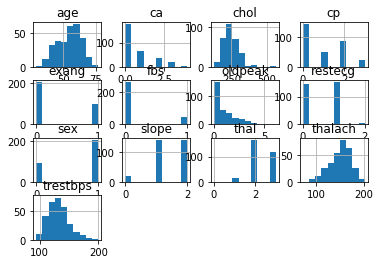

In [96]:
df.hist()

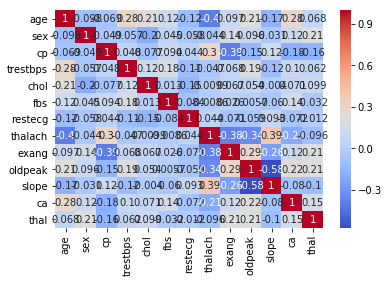

In [97]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

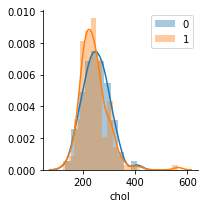

In [98]:
#Cholesterol is a key cause of the fatty build-up in arteries that leads to heart disease
import matplotlib.pyplot as plt
g = sns.FacetGrid(data, hue="target")
g = g.map(sns.distplot, "chol")
plt.legend()

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into linearly uncorrelated variables  which will help to  identify strong patterns in a dataset. PCA also help us to easily explore and visualize the data.

In [99]:
#scale the data before the PCA
from sklearn.preprocessing import StandardScaler
df = StandardScaler().fit_transform(df)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_new = pca.fit_transform(df)

/home/boby/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/boby/.local/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [100]:
def myplot(score,coeff,labels=labels):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')



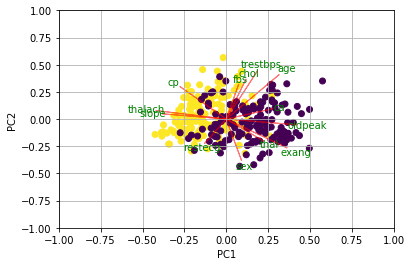

In [101]:
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
#Call the function. Use only the 2 PCs.
myplot(df_new[:,0:2],np.transpose(pca.components_[0:2, :]),labels)
plt.show()

# Feature Selection With XGBoost

XBGoost can automatically provide estimates of feature importance from a trained predictive model.A benefit of using gradient boosting is that after the boosted trees are constructed, it is relatively straightforward to retrieve importance scores for each attribute.

In [102]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [103]:
X=data.drop('target',axis=1)
y=data['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.20)
    
# creating model 
model = XGBClassifier()
# fitting model 
model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

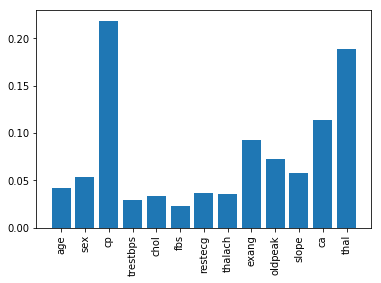

In [105]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.xticks(range(len(model.feature_importances_)), labels,rotation='vertical')
plt.show()


In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [107]:
classi=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['Support Vector Classification :',SVC()],
       ['Gausian Naive Bayes :',GaussianNB()]]

In [108]:
pred_all=[]
for name,model in classi:
    model=model
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    pred_all.append(accuracy_score(y_test,pred))
    print(name,accuracy_score(y_test,pred))
    #print(classification_report(y_test,pred))

Logistic Regression : 0.8688524590163934
Decision Tree Classification : 0.8032786885245902
Random Forest Classification : 0.8524590163934426
Gradient Boosting Classification : 0.7704918032786885
Ada Boosting Classification : 0.8032786885245902
Extra Tree Classification : 0.8360655737704918
Support Vector Classification : 0.5409836065573771
Gausian Naive Bayes : 0.8688524590163934


/home/boby/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/boby/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/boby/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/boby/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [109]:
yax=['Logistic Regression' ,
      'Decision Tree Classifier',
      'Random Forest Classifier',
      'Gradient Boosting Classifier',
      'Ada Boosting Classifier',
      'Extra Tree Classifier',
      'Support Vector Classifier',
      'Gaussian Naive Bayes']
xax=pred_all

Text(0.5,0,'Accuracy')

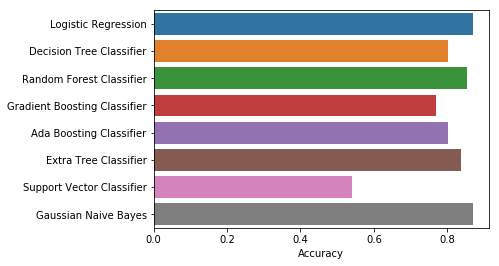

In [110]:
sns.barplot(x=xax,y=yax)
plt.xlabel('Accuracy')

In [111]:
from sklearn import model_selection
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values


X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [113]:
# convert to categorical 
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)

In [114]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
def create_model():
    # create model
    mod = Sequential()
    mod.add(Dense(16, input_dim=13, kernel_initializer='normal', activation='relu'))
    mod.add(Dense(8, kernel_initializer='normal', activation='relu'))
    mod.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    mod.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return mod

mod = create_model()

print(mod.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 16)                224       
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_30 (Dense)             (None, 2)                 18        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


In [115]:
# fit the mod
history=mod.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=200, batch_size=10, verbose = 10)

Train on 242 samples, validate on 61 samples
Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Ep

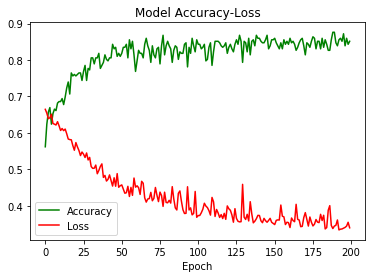

In [90]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'],'green')
plt.plot(history.history['loss'],'red')
plt.title('Model Accuracy-Loss')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Loss'])
plt.show()

In [117]:
# classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(mod.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.8032786885245902
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        30
           1       0.74      0.94      0.83        31

   micro avg       0.80      0.80      0.80        61
   macro avg       0.83      0.80      0.80        61
weighted avg       0.82      0.80      0.80        61

